In [1]:
import pandas as pd
from scipy.stats import rankdata

import sys
sys.path.insert(0, '..')

from gsea.run_single_sample_gsea import run_single_sample_gsea

%matplotlib inline

In [2]:
gene_x_sample = pd.read_table(
    'gene_x_kras_isogenic_and_imortalized_cell_line.tsv', index_col=0)

gene_x_sample

,SLG1_1,SLG2_1,SLGP1_1,SLGP2_1,SLK1PU_1,SLK1_1,SLK2PU_1,SLK2_1,SLKP1_1,SLKP2_1
Name,,,,,,,,,,
7SK,0.095021,0.317834,0.166109,0.000000,0.188393,0.291156,0.103048,0.385592,0.139740,0.000000
A1BG,0.034328,0.019137,0.040007,0.081093,0.170151,0.026296,0.093070,0.116085,0.016828,0.099104
A1CF,0.000000,0.015482,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.013613,0.008017
A2LD1,1.019684,0.785201,1.957793,1.646291,1.418078,2.135402,1.519507,1.309818,0.747987,1.279170
A2M,0.193676,0.418990,0.256033,0.344846,10.144233,0.419251,0.238250,0.435324,0.325918,0.340488
A2ML1,0.863153,1.158374,0.102432,0.055900,0.017873,0.004604,0.007332,0.008129,0.006629,0.002602
A2ML1-AS1,0.938860,0.672937,0.859698,0.475254,1.063671,0.787689,0.909078,0.544265,0.460236,0.464648
A2MP1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.007059,0.008804,0.000000,0.000000
A3GALT2P,0.000000,0.000000,0.000000,0.017346,0.072792,0.000000,0.063706,0.000000,0.014398,0.033918


In [3]:
column_0 = gene_x_sample.iloc[:, 1]
gene_x_sample = pd.concat(
    [
        column_0,
        column_0 * 1000,
        column_0 * -1,
    ], axis=1)

gene_x_sample.columns = [
    'small',
    'big',
    'flipped',
]

gene_x_sample

,small,big,flipped
Name,,,
7SK,0.317834,317.834258,-0.317834
A1BG,0.019137,19.137247,-0.019137
A1CF,0.015482,15.481619,-0.015482
A2LD1,0.785201,785.201430,-0.785201
A2M,0.418990,418.989986,-0.418990
A2ML1,1.158374,1158.373952,-1.158374
A2ML1-AS1,0.672937,672.936738,-0.672937
A2MP1,0.000000,0.000000,-0.000000
A3GALT2P,0.000000,0.000000,-0.000000


In [4]:
gene_sets = []

with open('c2.all.v5.1.symbols.5.gmt') as f:
    for line in f:
        line = line.strip().split('\t')

        gene_sets.append(line[:1] + [g for g in line[2:] if g != 'None'])

gene_sets = pd.DataFrame(gene_sets).set_index(0)

gene_sets

,1,2,3,4,5,6,7,8,9,10,...,37,38,39,40,41,42,43,44,45,46
0,,,,,,,,,,,,,,,,,,,,,
ABBUD_LIF_SIGNALING_1_DN,AHNAK,ALCAM,ANKRD40,BCKDHB,C16orf89,CAPN9,CD24,CYFIP1,DCAF11,DDC,...,None,None,None,None,None,None,None,None,None,None
ABBUD_LIF_SIGNALING_1_UP,ACAA2,AHSG,ALDOC,ANXA8L2,BCL3,CEBPB,CXCL14,CYB561,ELF3,FBP1,...,ST3GAL1,STAT3,TAPBP,TMEM176A,TMEM176B,TNFRSF1A,TSPAN4,UPP1,VWF,XBP1
ABBUD_LIF_SIGNALING_2_DN,CGA,CITED2,NALCN,PITX2,PTHLH,SCN1A,ZNF280D,None,None,None,...,None,None,None,None,None,None,None,None,None,None
ABBUD_LIF_SIGNALING_2_UP,ANGPT1,ATP1B1,C2CD4B,COL11A1,DCN,DIO2,EZR,FGFR1,GPX2,JUNB,...,None,None,None,None,None,None,None,None,None,None
ABDELMOHSEN_ELAVL4_TARGETS,BCL2,CAB39,CASP3,CDC42,CDH2,DLG4,EIF2AK2,ITGA1,ITGB1,KCNQ2,...,None,None,None,None,None,None,None,None,None,None


In [5]:
gene_set_x_sample = run_single_sample_gsea(
    gene_x_sample, gene_sets)

gene_set_x_sample

(1/5) Computing ABBUD_LIF_SIGNALING_1_DN enrichment ...
(2/5) Computing ABBUD_LIF_SIGNALING_1_UP enrichment ...
(3/5) Computing ABBUD_LIF_SIGNALING_2_DN enrichment ...
(4/5) Computing ABBUD_LIF_SIGNALING_2_UP enrichment ...
(5/5) Computing ABDELMOHSEN_ELAVL4_TARGETS enrichment ...


,small,big,flipped
0,,,
ABBUD_LIF_SIGNALING_1_DN,16769.133482,16769.133482,-16769.434621
ABBUD_LIF_SIGNALING_1_UP,17138.826101,17138.826101,-17138.973346
ABBUD_LIF_SIGNALING_2_DN,13062.459093,13062.459093,-13062.198319
ABBUD_LIF_SIGNALING_2_UP,18052.785787,18052.785787,-18052.860627
ABDELMOHSEN_ELAVL4_TARGETS,18309.260879,18309.260879,-18309.355218


In [7]:
gene_set_x_sample = run_single_sample_gsea(
    gene_x_sample.apply(rankdata), gene_sets)

gene_set_x_sample

(1/5) Computing ABBUD_LIF_SIGNALING_1_DN enrichment ...
(2/5) Computing ABBUD_LIF_SIGNALING_1_UP enrichment ...
(3/5) Computing ABBUD_LIF_SIGNALING_2_DN enrichment ...
(4/5) Computing ABBUD_LIF_SIGNALING_2_UP enrichment ...
(5/5) Computing ABDELMOHSEN_ELAVL4_TARGETS enrichment ...


,small,big,flipped
0,,,
ABBUD_LIF_SIGNALING_1_DN,12161.507687,12161.507687,298.883535
ABBUD_LIF_SIGNALING_1_UP,11395.945444,11395.945444,-582.236211
ABBUD_LIF_SIGNALING_2_DN,7690.221507,7690.221507,4580.282376
ABBUD_LIF_SIGNALING_2_UP,10408.001786,10408.001786,313.071666
ABDELMOHSEN_ELAVL4_TARGETS,14322.605672,14322.605672,-732.031961


In [12]:
gene_set_x_sample = run_single_sample_gsea(
    gene_x_sample.apply(lambda row: (row - row.mean()) / row.std(), axis=1),
    gene_sets)

gene_set_x_sample

(1/5) Computing ABBUD_LIF_SIGNALING_1_DN enrichment ...
(2/5) Computing ABBUD_LIF_SIGNALING_1_UP enrichment ...
(3/5) Computing ABBUD_LIF_SIGNALING_2_DN enrichment ...
(4/5) Computing ABBUD_LIF_SIGNALING_2_UP enrichment ...
(5/5) Computing ABDELMOHSEN_ELAVL4_TARGETS enrichment ...


,small,big,flipped
0,,,
ABBUD_LIF_SIGNALING_1_DN,5189.382513,3627.712508,5201.798738
ABBUD_LIF_SIGNALING_1_UP,4778.040907,5386.136511,3933.638474
ABBUD_LIF_SIGNALING_2_DN,4475.281607,1963.153576,1829.736154
ABBUD_LIF_SIGNALING_2_UP,1015.792264,8284.721579,1089.124853
ABDELMOHSEN_ELAVL4_TARGETS,4405.352588,7613.275884,4420.758623


In [13]:
gene_set_x_sample = run_single_sample_gsea(
    gene_x_sample.apply(lambda row: (row - row.mean()) / row.std(), axis=1),
    gene_sets,
    power=0.999999)

gene_set_x_sample

(1/5) Computing ABBUD_LIF_SIGNALING_1_DN enrichment ...
(2/5) Computing ABBUD_LIF_SIGNALING_1_UP enrichment ...
(3/5) Computing ABBUD_LIF_SIGNALING_2_DN enrichment ...
(4/5) Computing ABBUD_LIF_SIGNALING_2_UP enrichment ...
(5/5) Computing ABDELMOHSEN_ELAVL4_TARGETS enrichment ...


,small,big,flipped
0,,,
ABBUD_LIF_SIGNALING_1_DN,NaN,NaN,NaN
ABBUD_LIF_SIGNALING_1_UP,NaN,NaN,NaN
ABBUD_LIF_SIGNALING_2_DN,NaN,NaN,NaN
ABBUD_LIF_SIGNALING_2_UP,NaN,NaN,NaN
ABDELMOHSEN_ELAVL4_TARGETS,NaN,NaN,NaN


(1/5) Computing ABBUD_LIF_SIGNALING_1_DN enrichment ...


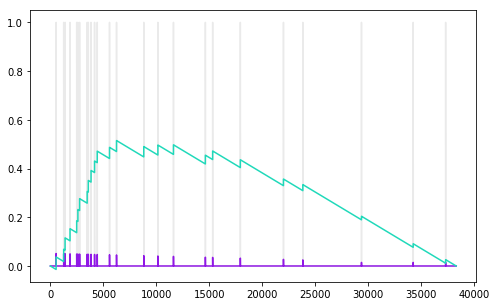

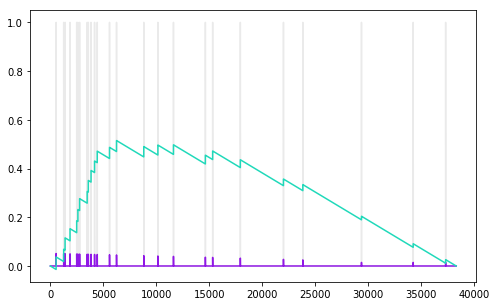

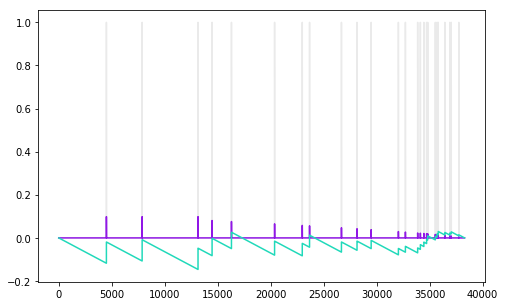

(2/5) Computing ABBUD_LIF_SIGNALING_1_UP enrichment ...


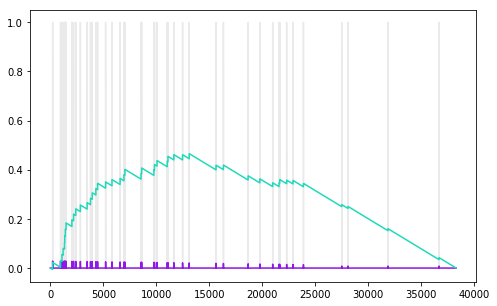

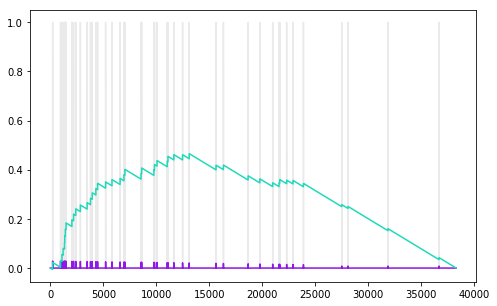

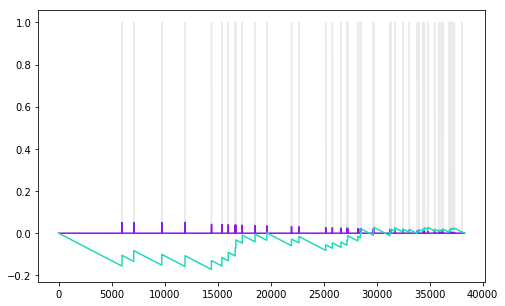

(3/5) Computing ABBUD_LIF_SIGNALING_2_DN enrichment ...


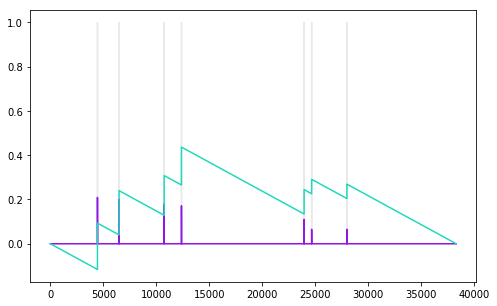

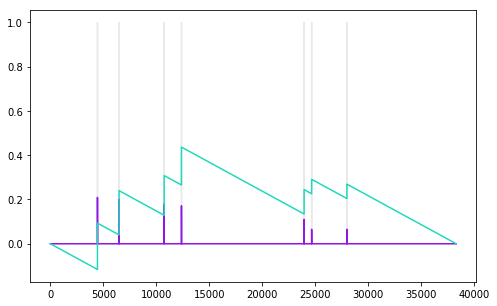

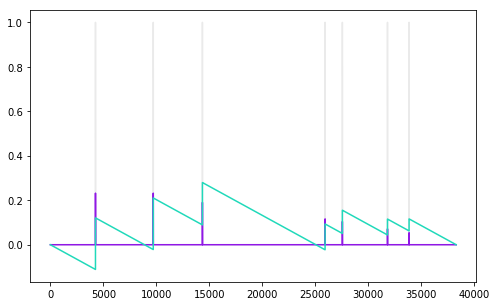

(4/5) Computing ABBUD_LIF_SIGNALING_2_UP enrichment ...


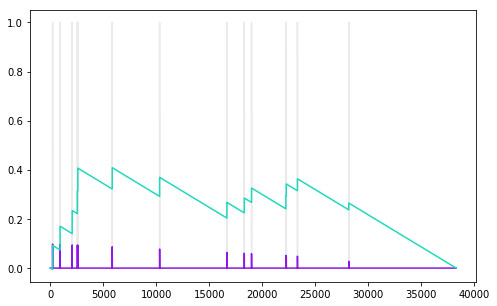

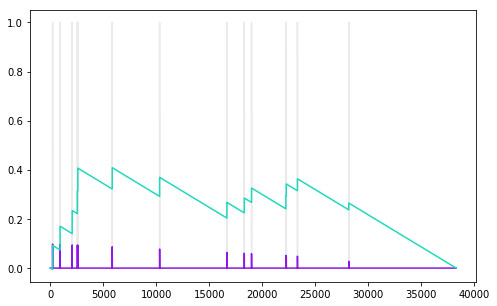

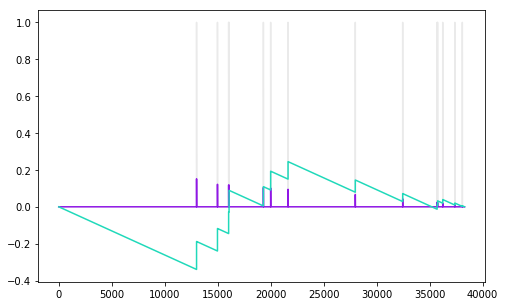

(5/5) Computing ABDELMOHSEN_ELAVL4_TARGETS enrichment ...


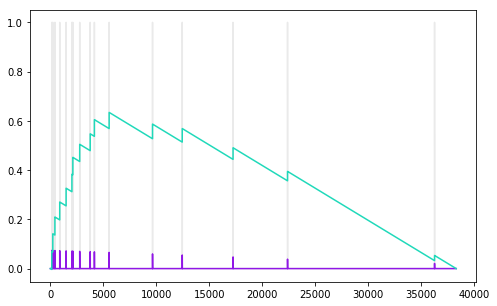

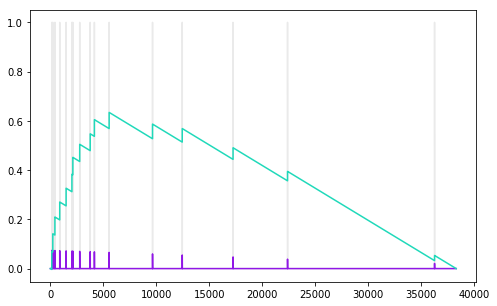

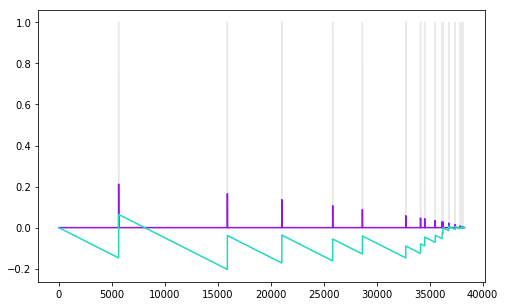

,small,big,flipped
0,,,
ABBUD_LIF_SIGNALING_1_DN,0.514890,0.514890,-0.146363
ABBUD_LIF_SIGNALING_1_UP,0.465618,0.465618,-0.171908
ABBUD_LIF_SIGNALING_2_DN,0.436645,0.436645,0.279588
ABBUD_LIF_SIGNALING_2_UP,0.408612,0.408612,-0.339742
ABDELMOHSEN_ELAVL4_TARGETS,0.634254,0.634254,-0.203795


In [6]:
gene_set_x_sample = run_single_sample_gsea(
    gene_x_sample.apply(rankdata),
    gene_sets,
    power=0.75,
    statistic='ks',
    plot=True)

gene_set_x_sample